# Importacao de bibliotecas


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

import kagglehub



# Download do dataset

Este código baixa um dataset do Kaggle, carrega os dados em um DataFrame Pandas e exibe uma prévia para verificar o conteúdo

In [4]:
# Caminho do dataset
#dataset_path = "marcopale/housing"
dataset_path = "yasserh/housing-prices-dataset"
!kaggle datasets download {dataset_path} -p /content/ --unzip

# Leitura do ficheiro CSV
df_file = pd.read_csv('Housing.csv')
df_data = pd.DataFrame(df_file)

# Exibir as primeiras linhas do dataframe
df_data.head()

Dataset URL: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset
License(s): CC0-1.0
  0% 0.00/4.63k [00:00<?, ?B/s]
100% 4.63k/4.63k [00:00<00:00, 11.6MB/s]


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Verificação de Valores Ausentes e Duplicados

Este codigo verifica as linhas duplicadas e valores ausentes, se encontrar algum desses remove-os do Data Frame.

In [5]:
missing_values = df_file.isnull().sum()
print(missing_values)
df_file = df_file.dropna()

duplicates = df_file.duplicated().sum()
print(f"\nLinhas duplicadas no dataset: {duplicates}")
df_file_cleaned = df_file.drop_duplicates()
print("\nLinhas duplicadas removidas.")

print(f"numero de linhas: {len(df_file_cleaned)}")

df_data = pd.DataFrame(df_file_cleaned)
df_data.head()

numero de linhas: 545

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Linhas duplicadas no dataset: 0

Linhas duplicadas removidas.
numero de linhas: 545


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Seleção Automatica

Este codigo verifica quais colunas numericas tem uma maior correlação com a coluna price



In [231]:
# Selecionar colunas numéricas
numerical_columns = df_file_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Exibir correlação com SalePrice
if 'price' in numerical_columns:
    correlation = df_file_cleaned[numerical_columns].corr()['price'].sort_values(ascending=False)
    important_columns = correlation[1:11]  # As 10 mais correlacionadas
    print("As colunas mais correlacionadas com price são:")
    print(important_columns)
else:
    print("A coluna 'price' não está no dataset.")

As colunas mais correlacionadas com price são:
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64


# Analise de Correlação

Este codigo com base nas colunas selecionadas, determina a correlação entres as mesmas e faz a visualizacao da correlação.




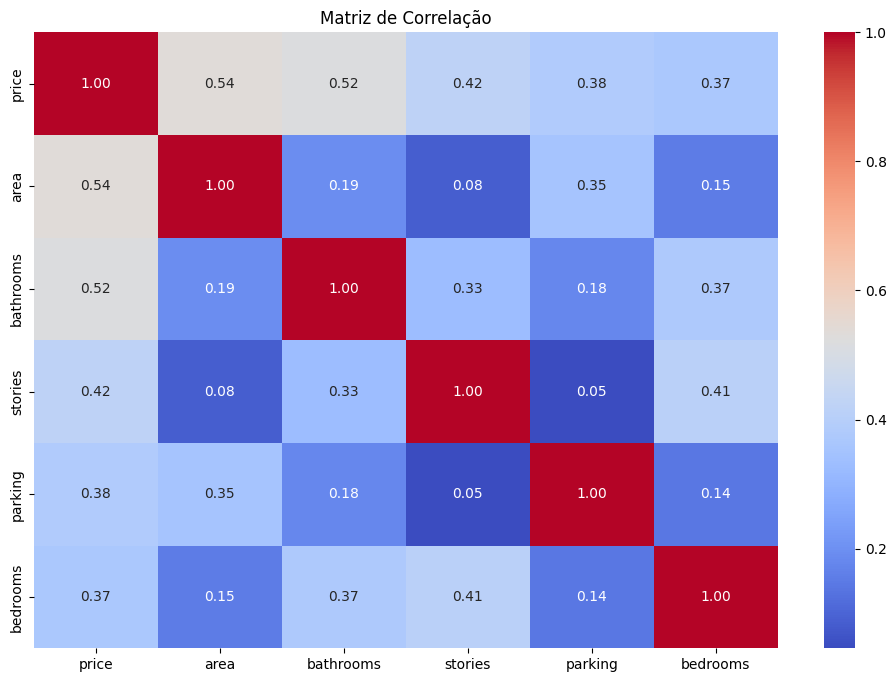

In [232]:
# Selecionar colunas numéricas

selected_columns = ['price', 'area', 'bathrooms', 'stories', 'parking', 'bedrooms']

# Calcular a matriz de correlação
correlation = df_file_cleaned[selected_columns].corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

# Normalização de Dados

Este codigo faz a normalização doa dados e remove os outliers

In [233]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_file_cleaned[selected_columns])

Q1 = df_file_cleaned[selected_columns].quantile(0.25)
Q3 = df_file_cleaned[selected_columns].quantile(0.75)
IQR = Q3 - Q1
df_file_cleaned = df_file_cleaned[~((df_file_cleaned[selected_columns] < (Q1 - 1.5 * IQR)) |
          (df_file_cleaned[selected_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]


# Avaliação do k-means

Esta função faz a avaliação do desempenho do k-means, com as metricas Elbow Method e a Shilouette Score




In [234]:
def evaluate_kmeans(data, max_k):
    inertia = []
    silhouette_scores = []
    k_values = range(2, max_k + 1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, labels))

    return k_values, inertia, silhouette_scores

k_values, inertia, silhouette_scores = evaluate_kmeans(scaled_data, max_k=10)

# Elbow Method

Neste codigo vamos visualizar o Elbow Method

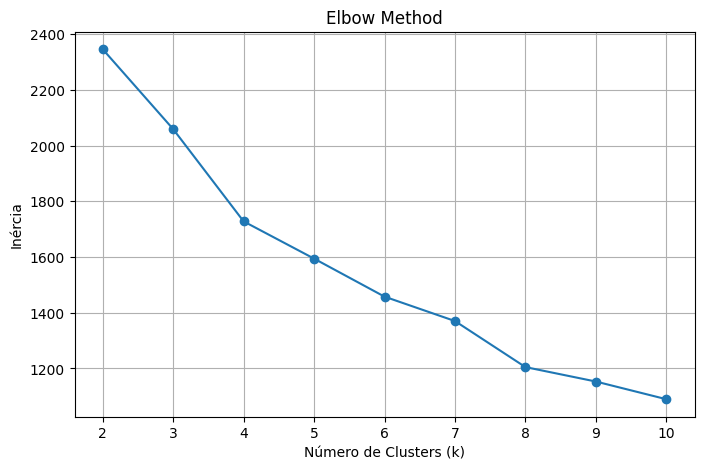

In [235]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inércia")
plt.grid()
plt.show()

# Silhouette Score

Neste codigo vamos visualizar o Shilouette Score, metrica que ajuda a determinar o numero de clusters

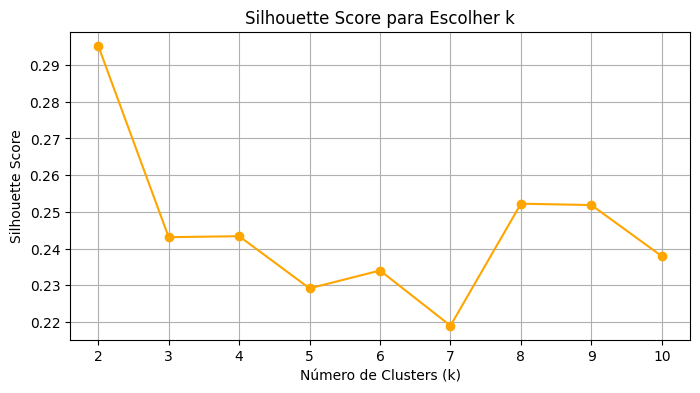

In [236]:
plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score para Escolher k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

#Implementação Manual do K-means

Neste codigo fazemos a implementação do k-means manualmente, ajustandos os dados em clusters ate que os centroides atingam convergencia

In [237]:
# Função KMeans Manual
def kmeans_manual(data, k, max_iters=100, tol=1e-4):
    np.random.seed(42)
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for i in range(max_iters):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)
        new_centroids = np.array([data[clusters == j].mean(axis=0) for j in range(k)])

        if np.all(np.abs(new_centroids - centroids) < tol):
            print(f"Convergência alcançada na iteração {i + 1}")
            break

        centroids = new_centroids

    return clusters, centroids

#Recalcular Centroides

Nesta função reacalculamos os centroides ate atingirem convergencia

In [238]:
def recalcular_centroides(data, clusters, centroids, k, tol=1e-4):
    """
    Recalcula os centróides dos clusters até a convergência.

    Parâmetros:
    - data: Matriz ou array dos dados (n_samples x n_features).
    - clusters: Array contendo o rótulo de cluster para cada ponto.
    - centroids: Array contendo os centróides atuais.
    - k: Número de clusters.
    - tol: Tolerância para verificar a convergência.

    Retorno:
    - novos_centroides: Array dos novos centróides recalculados.
    - convergiu: Booleano indicando se os centróides convergiram.
    """
    novos_centroides = np.zeros_like(centroids)
    convergiu = True

    for cluster_id in range(k):
        # Seleciona os pontos do cluster atual
        pontos_cluster = data[clusters == cluster_id]

        # Verifica se o cluster contém pontos
        if len(pontos_cluster) > 0:
            # Recalcula o centróide como a média dos pontos do cluster
            novos_centroides[cluster_id] = pontos_cluster.mean(axis=0)
        else:
            # Se o cluster estiver vazio, mantém o centróide antigo
            novos_centroides[cluster_id] = centroids[cluster_id]

    # Verifica se os centróides convergiram
    if not np.all(np.abs(novos_centroides - centroids) < tol):
        convergiu = False

    return novos_centroides, convergiu

#Aplicar o K-means e mapear clusters

Nesta função aplicamos o k-means com o optmial_k e para cada cluster, e dado um nome

In [239]:
optimal_k = 2

clusters, centroids_scaled = kmeans_manual(scaled_data, optimal_k)

# Adicionar coluna de clusters ao dataframe
df_file_cleaned['Cluster'] = clusters

# Mapeamento dos nomes dos clusters
cluster_names = {
    0: "Econômico",
    1: "Luxo",
}

# Adicionar coluna de nomes dos clusters
df_file_cleaned['Cluster_Nome'] = df_file_cleaned['Cluster'].map(cluster_names)

# Recalcular os centroides
centroids_original = scaler.inverse_transform(centroids_scaled)
centroids_df = pd.DataFrame(centroids_original, columns=selected_columns)
print("Centroides dos Clusters (valores originais):")
print(centroids_df)

Convergência alcançada na iteração 9
Centroides dos Clusters (valores originais):
          price         area  bathrooms   stories   parking  bedrooms
0  3.915066e+06  4562.595745   1.050532  1.515957  0.518617  2.720745
1  6.661553e+06  6458.633136   1.810651  2.449704  1.082840  3.508876


#Visualizar Centroides e Clusters

Agora, visualizamos os clusters e centroides

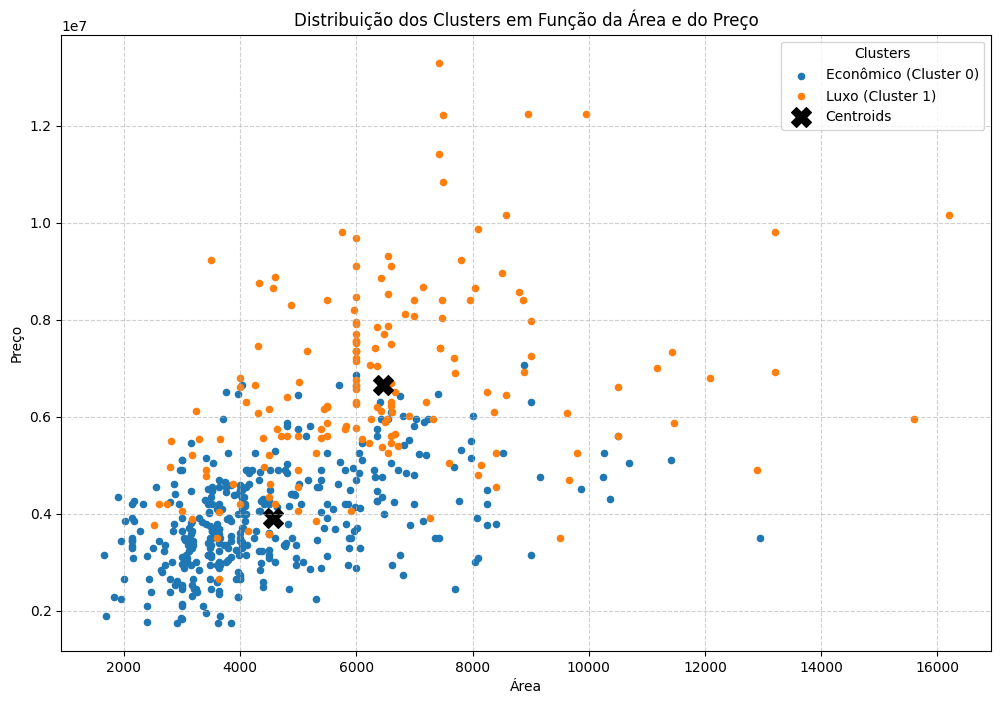

In [248]:
# Plotando os clusters
plt.figure(figsize=(12, 8))

# Paleta de cores para os clusters
palette = sns.color_palette("tab10", len(cluster_names))

# Iterar sobre cada cluster para plotar seus pontos
for cluster_id, cluster_nome in cluster_names.items():
    cluster_points = df_file[df_file['Cluster'] == cluster_id]
    plt.scatter(
        cluster_points['area'],  # Eixo X
        cluster_points['price'],  # Eixo Y
        s=20,
        color=palette[cluster_id],
        label=f'{cluster_nome} (Cluster {cluster_id})'
    )

# Plotando os centróides
plt.scatter(
    centroids_original[:, selected_columns.index('area')],
    centroids_original[:, selected_columns.index('price')],
    c='black',
    marker='X',
    s=200,
    label='Centroids'
)

# Personalizar o gráfico
plt.title("Distribuição dos Clusters em Função da Área e do Preço")
plt.xlabel("Área")
plt.ylabel("Preço")
plt.legend(title="Clusters")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()